## Data visualization and analysis
- We will begin by importing the necessary libraries, such as Pandas and NumPy, for handling and analyzing our dataset. Then, we will load the dataset located at './dataset/tracks.csv' into a Pandas DataFrame. This will allow us to perform data visualization and analysis on the dataset. The first step is to explore the dataset and get familiar with its structure, columns, and basic statistics.

In [13]:
import pandas as pd
import numpy as np

# Load dataset
tracks_path = './dataset/tracks.csv'
tracks_df = pd.read_csv(tracks_path)

tracks_df.info()        # Display the basic information of the dataset
tracks_df.describe()    # Display the basic statistics of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


### Clean Data and Remove Unnecessary Attributes
- We will now clean the dataset by removing any duplicate or missing values. This is an important step as it ensures the quality of our analysis and visualizations. Once the dataset is cleaned, we will display the basic information and statistics again to make sure the dataset is ready for further processing.


In [14]:
# Remove the duplicate rows and the rows with missing values
tracks_df.drop_duplicates(inplace=True)
tracks_df.dropna(inplace=True)  
tracks_df.reset_index(drop=True, inplace=True)

# Remove name, artists, id_artists, time_signature columns
tracks_df.drop(['name', 'artists', 'id_artists', 'time_signature'], axis=1, inplace=True)

# Display the basic information of the dataset
tracks_df.info()
tracks_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586601 entries, 0 to 586600
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586601 non-null  object 
 1   popularity        586601 non-null  int64  
 2   duration_ms       586601 non-null  int64  
 3   explicit          586601 non-null  int64  
 4   release_date      586601 non-null  object 
 5   danceability      586601 non-null  float64
 6   energy            586601 non-null  float64
 7   key               586601 non-null  int64  
 8   loudness          586601 non-null  float64
 9   mode              586601 non-null  int64  
 10  speechiness       586601 non-null  float64
 11  acousticness      586601 non-null  float64
 12  instrumentalness  586601 non-null  float64
 13  liveness          586601 non-null  float64
 14  valence           586601 non-null  float64
 15  tempo             586601 non-null  float64
dtypes: float64(9), int64

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,586601.000000,5.866010e+05,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000
mean,27.573212,2.300549e+05,0.044091,0.563612,0.542071,5.221594,-10.205789,0.658797,0.104870,0.449803,0.113425,0.213933,0.552306,118.467930
std,18.369417,1.265328e+05,0.205298,0.166101,0.251910,3.519420,5.089422,0.474114,0.179902,0.348812,0.266843,0.184328,0.257673,29.762942
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750830e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.606000
50%,27.000000,2.149070e+05,0.000000,0.577000,0.549000,5.000000,-9.242000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.387000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.481000,1.000000,0.076300,0.784000,0.009550,0.278000,0.769000,136.324000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000


- This is to have consistent dates. All dates converted to year.

In [15]:
# Convert release_date to year only
tracks_df['year'] = pd.to_datetime(tracks_df['release_date'], format='mixed').dt.year
tracks_df.drop('release_date', axis=1, inplace=True)

# Display the first 5 rows of the dataset with the new 'year' column
tracks_df.head()


,id,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
0,35iwgR4jXetI318WEWsa1Q,6,126903,0,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,1922
1,021ht4sdgPcrDgSk7JTbKY,0,98200,0,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1922
2,07A5yehtSnoedViJAZkNnc,0,181640,0,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,1922
3,08FmqUhxtyLTn6pAh6bk45,0,176907,0,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,1922
4,08y9GfoqCWfOGsKdwojr5e,0,163080,0,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,1922


In [16]:
tracks_df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
count,586601.000000,5.866010e+05,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000
mean,27.573212,2.300549e+05,0.044091,0.563612,0.542071,5.221594,-10.205789,0.658797,0.104870,0.449803,0.113425,0.213933,0.552306,118.467930,1988.571729
std,18.369417,1.265328e+05,0.205298,0.166101,0.251910,3.519420,5.089422,0.474114,0.179902,0.348812,0.266843,0.184328,0.257673,29.762942,22.826243
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000
25%,13.000000,1.750830e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.606000,1974.000000
50%,27.000000,2.149070e+05,0.000000,0.577000,0.549000,5.000000,-9.242000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.387000,1992.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.481000,1.000000,0.076300,0.784000,0.009550,0.278000,0.769000,136.324000,2007.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,2021.000000


### Visualize to Get Better Understanding of the Data

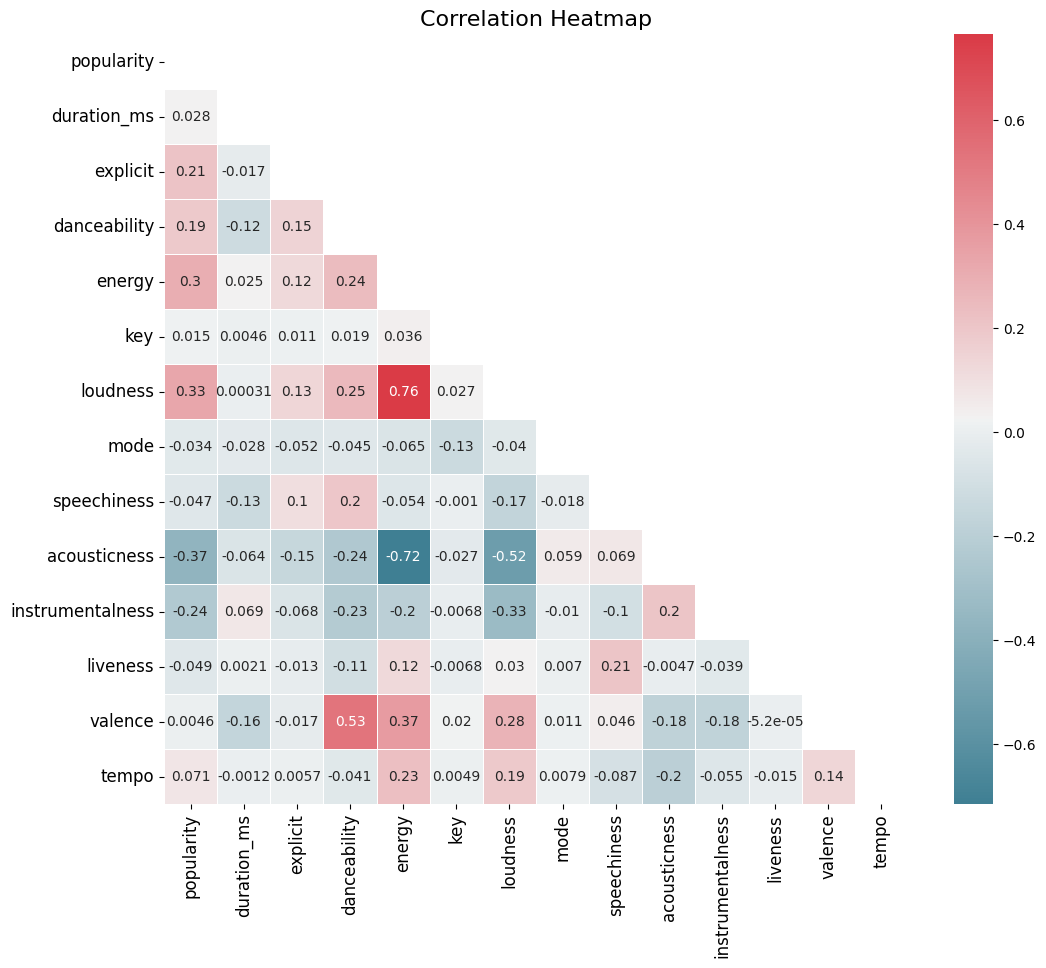

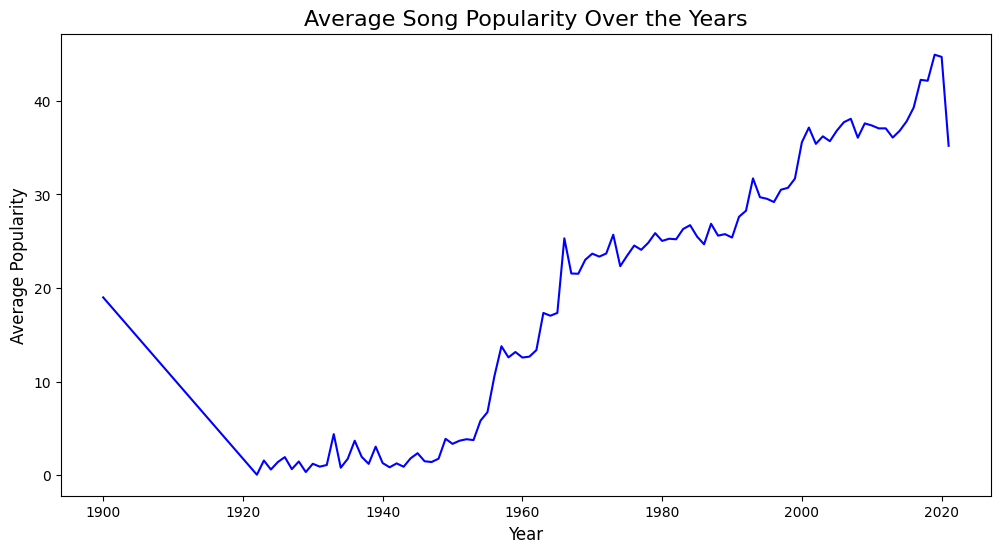

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix (excluding 'id' and 'release_date' columns)
numeric_columns = tracks_df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = tracks_df[numeric_columns].corr()

# Create a more visually appealing heatmap using Seaborn
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap=cmap, linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Group the dataset by year and calculate the average popularity
yearly_popularity = tracks_df.groupby('year')['popularity'].mean().reset_index()

# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_popularity, x='year', y='popularity', color='blue')
plt.title("Average Song Popularity Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Popularity", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

According to Heatmap we can select instrumentalness, accousticness, loudness, energy, danceability since they're the most correlated ones. this way we can reduce the number of features for better similarity analysis.

## Hypotheses testing

### Hypotheses One: Songs that are similar in their musical properties are likelyto be related to each other in a network

To create a network based on song property similarities, we can use the following approach:
- Calculate the similarity between songs using a similarity metric, such as cosine similarity or Euclidean distance.
- Set a similarity threshold to determine which songs are related to each other.
- Create a network (graph) using the song similarities, with songs as nodes and edges representing the relationships between similar songs.
- Analyze the network properties to prove or disprove your hypothesis.

Let's start by calculating the similarity between songs. We will use the cosine similarity metric in this case.

In [18]:
# Take a random sample of 1% of the dataset because of high memory load
sampled_tracks_df = tracks_df.sample(frac=0.01, random_state=42)

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import networkx as nx
import os

if not os.path.exists("./gephi/song_network_0.01.gexf"):
    # Select features for similarity calculation  
    features = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness']

    # Scale the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(sampled_tracks_df[features])

    # Compute the cosine similarity matrix
    similarity_matrix = cosine_similarity(scaled_data)

    similarity_threshold = 0.98 # Higher threshold means fewer edges and sparser network but this helps to focus on most similar songs


    # Initialize an empty graph
    song_network = nx.Graph()

    # Add nodes to the graph
    song_network.add_nodes_from(sampled_tracks_df.index)

    # Add edges between similar songs
    for i in range(len(similarity_matrix)):
        for j in range(i+1, len(similarity_matrix)):
            if similarity_matrix[i][j] >= similarity_threshold:
                song_network.add_edge(i, j, weight=similarity_matrix[i][j])

    # Add attributes to nodes
    for i, row in sampled_tracks_df.iterrows():
        song_network.nodes[i]['popularity'] = row['popularity']
        for feature in features:
            song_network.nodes[i][feature] = row[feature]
            
else:
    print("Loading existing network...")
    song_network = nx.read_gexf("./gephi/song_network_0.01.gexf")

Loading existing network...


### Degree Distribution

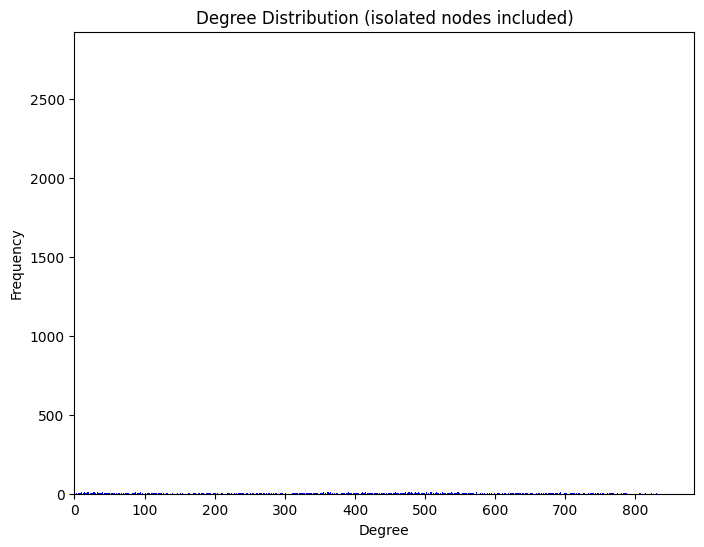

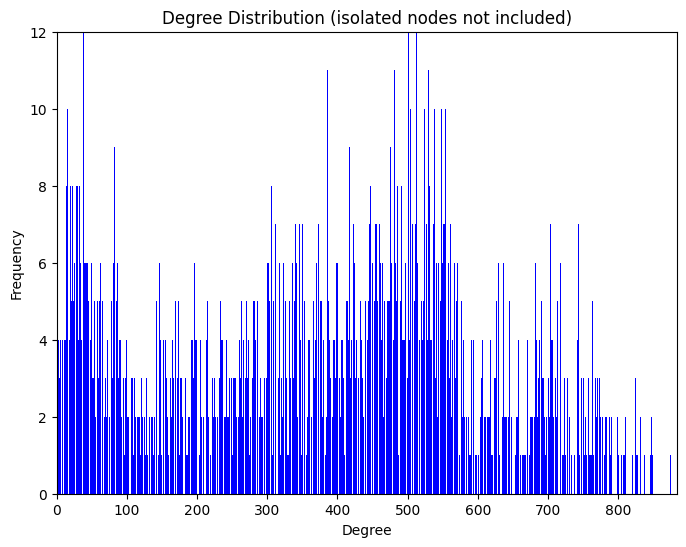

In [20]:
import collections
import matplotlib.pyplot as plt

def degree_distribution(G, show_isolated_nodes=False):
    network = None
    network = G.copy()
    if not show_isolated_nodes:
        not_isolated_nodes = [n for n, d in G.degree() if d != 0]
        network = G.subgraph(not_isolated_nodes)
                
    degree_sequence = sorted([d for n, d in network.degree()], reverse=True)
    degree_count = collections.Counter(degree_sequence)
    deg, cnt = zip(*degree_count.items())

    plt.figure(figsize=(8, 6))
    plt.bar(deg, cnt, width=0.80, color="b")
    tag = " (isolated nodes included)" if show_isolated_nodes else " (isolated nodes not included)"
    plt.title(f"Degree Distribution{tag}")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.xlim(0, max(deg))
    plt.ylim(0, max(cnt))
    plt.show()

degree_distribution(song_network, show_isolated_nodes=True)
degree_distribution(song_network, show_isolated_nodes=False)

In [21]:
isolated_nodes = [n for n, d in song_network.degree() if d == 0]
if len(isolated_nodes) > 0:
    print("Number of isolated nodes:", len(isolated_nodes))
    print("Max Popularity in isolated nodes:", max([song_network.nodes[n]['popularity'] for n in isolated_nodes]))
    print("Min Popularity in isolated nodes:", min([song_network.nodes[n]['popularity'] for n in isolated_nodes]))
    print("Average Popularity in isolated nodes:", np.mean([song_network.nodes[n]['popularity'] for n in isolated_nodes]))


Number of isolated nodes: 2923
Max Popularity in isolated nodes: 84
Min Popularity in isolated nodes: 0
Average Popularity in isolated nodes: 27.839206294902496


### First Visualization Trials
- Visualizing large graphs can be challenging, but we can use the networkx library to save network as GEFX file along with Gephi to create a basic visualization of our graph.


In [22]:
num_nodes = song_network.number_of_nodes()
num_edges = song_network.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)


Number of nodes: 5852
Number of edges: 561271


### Clustering Coefficient

In [23]:
avg_clustering_coefficient = nx.average_clustering(song_network)
print("Average Clustering Coefficient:", avg_clustering_coefficient)


Average Clustering Coefficient: 0.3417829347815979


### Network Diameter

In [24]:
# Check if the network is connected
if nx.is_connected(song_network):
    network_diameter = nx.diameter(song_network)
    print("Network Diameter:", network_diameter)
else:
    print("The network is not connected, so the diameter is infinite.")


The network is not connected, so the diameter is infinite.


- A disconnected network is not necessarily a bad thing, as it can provide insights into the different groups or clusters of songs within the dataset. In many real-world networks, it is common to have disconnected components, as not all entities are connected to each other. The presence of disconnected components might indicate that there are distinct groups of songs with different characteristics or styles.

- When analyzing a disconnected network, it's important to consider the following:


### Connected components:
- Analyzing the connected components, their sizes, and their properties. We may find that some connected components have distinct characteristics, which can help us to understand the relationships between songs.

In [25]:
connected_components = list(nx.connected_components(song_network))
sorted_connected_components = sorted(connected_components, key=len, reverse=True)
number_of_connected_components = len(connected_components)

print("Number of connected components:", number_of_connected_components)
print("Sizes of the largest connected components:", [len(cc) for cc in sorted_connected_components[:5]])


Number of connected components: 2924
Sizes of the largest connected components: [2929, 1, 1, 1, 1]


In [26]:
# Save the final network to a file
nx.write_gexf(song_network, "gephi/song_network_0.01.gexf")

# Year Series Analysis of Networks (Year By Year)

- Here's a function called generate_network_and_metrics that takes a DataFrame, a year, a similarity threshold, and a path to save the output files. This function applies all the steps in the provided code to create a network for the given year, and it saves the network to the specified path.

- Additionally, the function saves the network metrics, including the year and path, to a JSON file. The popularity value is also added as an attribute to each node. This popularity value will be used on Hypotheses Testing.

In [27]:
# from by_year_analysis import NetworkGenerationThread

# years = tracks_df['year'].unique()
# features = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness']
# similarity_threshold = 0.98
# gephi_path = "./gephi/"
# metrics_path = "./metrics/"

# threads = []

# # Create a thread for each year
# for year in years:
#     thread = NetworkGenerationThread(tracks_df[tracks_df["year"] == year].copy(), year, features, similarity_threshold, gephi_path, metrics_path)
#     threads.append(thread)
#     thread.start()

# # Wait for all threads to finish
# for thread in threads:
#     thread.join()


There was too many edges and it was hard to work on it so we started to test different similarity calculation methods such as k-nearest so that we have limited edges.

In [28]:
# Take a random sample of 5% of the dataset because of high memory load
sampled_tracks_df = tracks_df.sample(frac=0.05, random_state=42)

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import networkx as nx
from sklearn.cluster import AgglomerativeClustering

if not os.path.exists("./gephi/song_network_clustering_0.05.gexf"):

    # Select features for similarity calculation  
    features = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness']

    # Scale the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(sampled_tracks_df[features])

    # Compute the cosine similarity matrix
    similarity_matrix = cosine_similarity(scaled_data)

    # Set the similarity threshold for merging nodes
    merge_threshold = 0.97

    # Use Agglomerative Clustering to identify nodes to be merged
    clustering = AgglomerativeClustering(n_clusters=None, affinity='precomputed', linkage='average', distance_threshold=1-merge_threshold)
    clustering.fit(1 - similarity_matrix)

    # Get the cluster labels (nodes to be merged will have the same label)
    labels = clustering.labels_

    # Merge nodes in the same cluster and compute average features
    merged_features = []
    for label in np.unique(labels):
        if label != -1:
            # Get indices of nodes in this cluster
            indices = np.where(labels == label)[0]
            
            # Merge nodes by averaging their features
            numeric_features = sampled_tracks_df.iloc[indices].select_dtypes(include=[np.number])
            merged_node = numeric_features.mean().to_dict()
            merged_features.append(merged_node)

    # Convert merged features to DataFrame
    merged_df = pd.DataFrame(merged_features)

    # Calculate similarity for merged nodes
    merged_scaled_data = scaler.transform(merged_df[features])
    merged_similarity_matrix = cosine_similarity(merged_scaled_data)

    # Initialize an empty graph
    song_network = nx.Graph()

    # Add nodes to the graph
    song_network.add_nodes_from(merged_df.index)

    # Set the similarity threshold for adding edges
    similarity_threshold = 0.85

    # Add edges between similar songs
    for i in range(len(merged_similarity_matrix)):
        for j in range(i+1, len(merged_similarity_matrix)):
            if merged_similarity_matrix[i][j] >= similarity_threshold:
                song_network.add_edge(i, j, weight=merged_similarity_matrix[i][j])

    # Add attributes to nodes
    for i, row in merged_df.iterrows():
        song_network.nodes[i]['popularity'] = row['popularity']
        for feature in features:
            song_network.nodes[i][feature] = row[feature]

    print("Number of nodes:", song_network.number_of_nodes())
    print("Number of edges:", song_network.number_of_edges())
    print("Network density:", nx.density(song_network))

    nx.write_gexf(song_network, "gephi/song_network_clustering_0.05.gexf")

else:
    print("Loading existing network...")
    song_network = nx.read_gexf("./gephi/song_network_clustering_0.05.gexf")

Loading existing network...


In [31]:
from by_year_analysis_clustering import NetworkGenerationThreadForClustering

years = tracks_df['year'].unique()
features = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness']
gephi_path = "./gephi/"
metrics_path = "./metrics/years/"
threshold = 0.85 # decided on 10 as the number of the isolated nodes doesn't change

threads = []

# Create a thread for each year
for year in years:
    thread = NetworkGenerationThreadForClustering(tracks_df[tracks_df["year"] == year].copy(), year, features, threshold, gephi_path, metrics_path)
    threads.append(thread)
    thread.start()

# Wait for all threads to finish
for thread in threads:
    thread.join()


/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:9

Generated K nearest network for 1922 with {'year': 1922, 'path': './gephi/song_network_clustering_1922.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 28, 'num_edges': 175, 'avg_clustering_coefficient': 0.7593413451136805, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1923 with {'year': 1923, 'path': './gephi/song_network_clustering_1923.gexf', 'number_of_removed_isolated_nodes': 2, 'similarity_threshold': 0.85, 'num_nodes': 19, 'num_edges': 80, 'avg_clustering_coefficient': 0.723328425960005, 'is_connected': False, 'number_of_connected_components': 3}.
Generated K nearest network for 1924 with {'year': 1924, 'path': './gephi/song_network_clustering_1924.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 17, 'num_edges': 55, 'avg_clustering_coefficient': 0.6344580256344963, 'is_connected': True, 'number_of_connected_components': 1}.


/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:9

Generated K nearest network for 1925 with {'year': 1925, 'path': './gephi/song_network_clustering_1925.gexf', 'number_of_removed_isolated_nodes': 12, 'similarity_threshold': 0.85, 'num_nodes': 29, 'num_edges': 72, 'avg_clustering_coefficient': 0.4462805393839876, 'is_connected': False, 'number_of_connected_components': 13}.
Generated K nearest network for 1927 with {'year': 1927, 'path': './gephi/song_network_clustering_1927.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 26, 'num_edges': 120, 'avg_clustering_coefficient': 0.6816351823139153, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1926 with {'year': 1926, 'path': './gephi/song_network_clustering_1926.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 26, 'num_edges': 118, 'avg_clustering_coefficient': 0.7085755056908903, 'is_connected': False, 'number_of_connected_components': 2}.
Generated K nearest netwo

/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 1933 with {'year': 1933, 'path': './gephi/song_network_clustering_1933.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 24, 'num_edges': 110, 'avg_clustering_coefficient': 0.7133359695859697, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1929 with {'year': 1929, 'path': './gephi/song_network_clustering_1929.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 30, 'num_edges': 210, 'avg_clustering_coefficient': 0.7423781894434068, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1930 with {'year': 1930, 'path': './gephi/song_network_clustering_1930.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 36, 'num_edges': 258, 'avg_clustering_coefficient': 0.7048381638809919, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network 

/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:9

Generated K nearest network for 1934 with {'year': 1934, 'path': './gephi/song_network_clustering_1934.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 29, 'num_edges': 190, 'avg_clustering_coefficient': 0.7465229517407378, 'is_connected': True, 'number_of_connected_components': 1}.


/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 1935 with {'year': 1935, 'path': './gephi/song_network_clustering_1935.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 35, 'num_edges': 242, 'avg_clustering_coefficient': 0.6937780915014921, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1938 with {'year': 1938, 'path': './gephi/song_network_clustering_1938.gexf', 'number_of_removed_isolated_nodes': 2, 'similarity_threshold': 0.85, 'num_nodes': 26, 'num_edges': 146, 'avg_clustering_coefficient': 0.7080593756617811, 'is_connected': False, 'number_of_connected_components': 3}.
Generated K nearest network for 1937 with {'year': 1937, 'path': './gephi/song_network_clustering_1937.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 27, 'num_edges': 123, 'avg_clustering_coefficient': 0.6831935554157776, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network

/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:9

Generated K nearest network for 1941 with {'year': 1941, 'path': './gephi/song_network_clustering_1941.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 35, 'num_edges': 204, 'avg_clustering_coefficient': 0.6907018886563339, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1940 with {'year': 1940, 'path': './gephi/song_network_clustering_1940.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 35, 'num_edges': 243, 'avg_clustering_coefficient': 0.6932778328295897, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1939 with {'year': 1939, 'path': './gephi/song_network_clustering_1939.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 34, 'num_edges': 260, 'avg_clustering_coefficient': 0.743277622794401, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network f

/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:9

Generated K nearest network for 1942 with {'year': 1942, 'path': './gephi/song_network_clustering_1942.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 49, 'num_edges': 403, 'avg_clustering_coefficient': 0.6916468917090859, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1946 with {'year': 1946, 'path': './gephi/song_network_clustering_1946.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 38, 'num_edges': 264, 'avg_clustering_coefficient': 0.6734465271200931, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1948 with {'year': 1948, 'path': './gephi/song_network_clustering_1948.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 34, 'num_edges': 225, 'avg_clustering_coefficient': 0.6986475508836211, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network 

/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:9

Generated K nearest network for 1950 with {'year': 1950, 'path': './gephi/song_network_clustering_1950.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 49, 'num_edges': 428, 'avg_clustering_coefficient': 0.6995460003193685, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1952 with {'year': 1952, 'path': './gephi/song_network_clustering_1952.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 40, 'num_edges': 282, 'avg_clustering_coefficient': 0.7007077372717772, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1951 with {'year': 1951, 'path': './gephi/song_network_clustering_1951.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 42, 'num_edges': 331, 'avg_clustering_coefficient': 0.7025204467680864, 'is_connected': True, 'number_of_connected_components': 1}.


/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:9

Generated K nearest network for 1953 with {'year': 1953, 'path': './gephi/song_network_clustering_1953.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 51, 'num_edges': 470, 'avg_clustering_coefficient': 0.7123971414379141, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1954 with {'year': 1954, 'path': './gephi/song_network_clustering_1954.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 47, 'num_edges': 422, 'avg_clustering_coefficient': 0.7105966853364993, 'is_connected': True, 'number_of_connected_components': 1}.


/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 1956 with {'year': 1956, 'path': './gephi/song_network_clustering_1956.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 48, 'num_edges': 495, 'avg_clustering_coefficient': 0.7235593080729159, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1957 with {'year': 1957, 'path': './gephi/song_network_clustering_1957.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 42, 'num_edges': 373, 'avg_clustering_coefficient': 0.7268330069246792, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1955 with {'year': 1955, 'path': './gephi/song_network_clustering_1955.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 58, 'num_edges': 577, 'avg_clustering_coefficient': 0.68086999680234, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network fo

/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 2021 with {'year': 2021, 'path': './gephi/song_network_clustering_2021.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 53, 'num_edges': 480, 'avg_clustering_coefficient': 0.6796544029677719, 'is_connected': True, 'number_of_connected_components': 1}.


/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 1967 with {'year': 1967, 'path': './gephi/song_network_clustering_1967.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 57, 'num_edges': 670, 'avg_clustering_coefficient': 0.698528371322987, 'is_connected': True, 'number_of_connected_components': 1}.


/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 1969 with {'year': 1969, 'path': './gephi/song_network_clustering_1969.gexf', 'number_of_removed_isolated_nodes': 1, 'similarity_threshold': 0.85, 'num_nodes': 51, 'num_edges': 626, 'avg_clustering_coefficient': 0.7319675953772544, 'is_connected': False, 'number_of_connected_components': 2}.


/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 1970 with {'year': 1970, 'path': './gephi/song_network_clustering_1970.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 65, 'num_edges': 846, 'avg_clustering_coefficient': 0.7125729432615747, 'is_connected': True, 'number_of_connected_components': 1}.


/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 1971 with {'year': 1971, 'path': './gephi/song_network_clustering_1971.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 52, 'num_edges': 565, 'avg_clustering_coefficient': 0.722918724758488, 'is_connected': True, 'number_of_connected_components': 1}.


/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 2006 with {'year': 2006, 'path': './gephi/song_network_clustering_2006.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 51, 'num_edges': 482, 'avg_clustering_coefficient': 0.7097578665025308, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1972 with {'year': 1972, 'path': './gephi/song_network_clustering_1972.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 55, 'num_edges': 676, 'avg_clustering_coefficient': 0.7282705394215736, 'is_connected': True, 'number_of_connected_components': 1}.


/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 1973 with {'year': 1973, 'path': './gephi/song_network_clustering_1973.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 64, 'num_edges': 834, 'avg_clustering_coefficient': 0.7160061827142005, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1974 with {'year': 1974, 'path': './gephi/song_network_clustering_1974.gexf', 'number_of_removed_isolated_nodes': 1, 'similarity_threshold': 0.85, 'num_nodes': 60, 'num_edges': 718, 'avg_clustering_coefficient': 0.7022232082436666, 'is_connected': False, 'number_of_connected_components': 2}.


/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 1976 with {'year': 1976, 'path': './gephi/song_network_clustering_1976.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 70, 'num_edges': 901, 'avg_clustering_coefficient': 0.6994629318995875, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1975 with {'year': 1975, 'path': './gephi/song_network_clustering_1975.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 68, 'num_edges': 814, 'avg_clustering_coefficient': 0.6912498938488267, 'is_connected': True, 'number_of_connected_components': 1}.


/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 1978 with {'year': 1978, 'path': './gephi/song_network_clustering_1978.gexf', 'number_of_removed_isolated_nodes': 1, 'similarity_threshold': 0.85, 'num_nodes': 54, 'num_edges': 620, 'avg_clustering_coefficient': 0.7260680089865335, 'is_connected': False, 'number_of_connected_components': 2}.
Generated K nearest network for 1977 with {'year': 1977, 'path': './gephi/song_network_clustering_1977.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 64, 'num_edges': 770, 'avg_clustering_coefficient': 0.6925768057251807, 'is_connected': True, 'number_of_connected_components': 1}.


/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 1979 with {'year': 1979, 'path': './gephi/song_network_clustering_1979.gexf', 'number_of_removed_isolated_nodes': 1, 'similarity_threshold': 0.85, 'num_nodes': 59, 'num_edges': 688, 'avg_clustering_coefficient': 0.6959582793695239, 'is_connected': False, 'number_of_connected_components': 2}.
Generated K nearest network for 2008 with {'year': 2008, 'path': './gephi/song_network_clustering_2008.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 54, 'num_edges': 504, 'avg_clustering_coefficient': 0.6681930609718032, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1980 with {'year': 1980, 'path': './gephi/song_network_clustering_1980.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 65, 'num_edges': 838, 'avg_clustering_coefficient': 0.7139172221283169, 'is_connected': True, 'number_of_connected_components': 1}.


/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 1983 with {'year': 1983, 'path': './gephi/song_network_clustering_1983.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 63, 'num_edges': 797, 'avg_clustering_coefficient': 0.7088782724909358, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1981 with {'year': 1981, 'path': './gephi/song_network_clustering_1981.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 61, 'num_edges': 675, 'avg_clustering_coefficient': 0.6916773707439273, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1982 with {'year': 1982, 'path': './gephi/song_network_clustering_1982.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 72, 'num_edges': 925, 'avg_clustering_coefficient': 0.6832660870816043, 'is_connected': True, 'number_of_connected_components': 1}.


/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 1991 with {'year': 1991, 'path': './gephi/song_network_clustering_1991.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 64, 'num_edges': 778, 'avg_clustering_coefficient': 0.706685337510703, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 2012 with {'year': 2012, 'path': './gephi/song_network_clustering_2012.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 68, 'num_edges': 732, 'avg_clustering_coefficient': 0.6740280954757139, 'is_connected': True, 'number_of_connected_components': 1}.


/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 1984 with {'year': 1984, 'path': './gephi/song_network_clustering_1984.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 54, 'num_edges': 569, 'avg_clustering_coefficient': 0.6965990504775624, 'is_connected': True, 'number_of_connected_components': 1}.Generated K nearest network for 1986 with {'year': 1986, 'path': './gephi/song_network_clustering_1986.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 62, 'num_edges': 780, 'avg_clustering_coefficient': 0.7139025763470371, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1985 with {'year': 1985, 'path': './gephi/song_network_clustering_1985.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 61, 'num_edges': 697, 'avg_clustering_coefficient': 0.6999527831857003, 'is_connected': True, 'number_of_connected_components': 1}.



/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 1987 with {'year': 1987, 'path': './gephi/song_network_clustering_1987.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 62, 'num_edges': 650, 'avg_clustering_coefficient': 0.6822838232764303, 'is_connected': True, 'number_of_connected_components': 1}.Generated K nearest network for 2007 with {'year': 2007, 'path': './gephi/song_network_clustering_2007.gexf', 'number_of_removed_isolated_nodes': 1, 'similarity_threshold': 0.85, 'num_nodes': 61, 'num_edges': 617, 'avg_clustering_coefficient': 0.6710429701200975, 'is_connected': False, 'number_of_connected_components': 2}.
Generated K nearest network for 1988 with {'year': 1988, 'path': './gephi/song_network_clustering_1988.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 64, 'num_edges': 744, 'avg_clustering_coefficient': 0.6823264660465204, 'is_connected': True, 'number_of_connected_components': 1}.

Generated K nearest network

/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 2017 with {'year': 2017, 'path': './gephi/song_network_clustering_2017.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 64, 'num_edges': 648, 'avg_clustering_coefficient': 0.6688979678472627, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 2014 with {'year': 2014, 'path': './gephi/song_network_clustering_2014.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 59, 'num_edges': 602, 'avg_clustering_coefficient': 0.6933699676303507, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 1992 with {'year': 1992, 'path': './gephi/song_network_clustering_1992.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 62, 'num_edges': 692, 'avg_clustering_coefficient': 0.7090281801033785, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network 

/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 1989 with {'year': 1989, 'path': './gephi/song_network_clustering_1989.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 68, 'num_edges': 870, 'avg_clustering_coefficient': 0.7078881829565262, 'is_connected': True, 'number_of_connected_components': 1}.


/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:9

Generated K nearest network for 2001 with {'year': 2001, 'path': './gephi/song_network_clustering_2001.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 58, 'num_edges': 542, 'avg_clustering_coefficient': 0.6784284257050457, 'is_connected': True, 'number_of_connected_components': 1}.Generated K nearest network for 2000 with {'year': 2000, 'path': './gephi/song_network_clustering_2000.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 54, 'num_edges': 529, 'avg_clustering_coefficient': 0.6752592013410642, 'is_connected': True, 'number_of_connected_components': 1}.



Exception in thread Thread-105:
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.9/3.9.16/Frameworks/Python.framework/Versions/3.9/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/by_year_analysis_clustering.py", line 170, in run
    process_year(
  File "/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/by_year_analysis_clustering.py", line 139, in process_year
    song_network, metrics = generate_network_by_clustering(
  File "/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/by_year_analysis_clustering.py", line 38, in generate_network_by_clustering
    clustering.fit(1 - similarity_matrix)
  File "/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py", line 955, in fit
    X = self._validate_data(X, ens

Generated K nearest network for 2003 with {'year': 2003, 'path': './gephi/song_network_clustering_2003.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 54, 'num_edges': 525, 'avg_clustering_coefficient': 0.689477659934664, 'is_connected': True, 'number_of_connected_components': 1}.


/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 2005 with {'year': 2005, 'path': './gephi/song_network_clustering_2005.gexf', 'number_of_removed_isolated_nodes': 1, 'similarity_threshold': 0.85, 'num_nodes': 44, 'num_edges': 404, 'avg_clustering_coefficient': 0.6913410449466327, 'is_connected': False, 'number_of_connected_components': 2}.
Generated K nearest network for 2002 with {'year': 2002, 'path': './gephi/song_network_clustering_2002.gexf', 'number_of_removed_isolated_nodes': 1, 'similarity_threshold': 0.85, 'num_nodes': 47, 'num_edges': 460, 'avg_clustering_coefficient': 0.6945771684465774, 'is_connected': False, 'number_of_connected_components': 2}.


/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 1995 with {'year': 1995, 'path': './gephi/song_network_clustering_1995.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 63, 'num_edges': 725, 'avg_clustering_coefficient': 0.6913966705357424, 'is_connected': True, 'number_of_connected_components': 1}.


/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 1999 with {'year': 1999, 'path': './gephi/song_network_clustering_1999.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 64, 'num_edges': 712, 'avg_clustering_coefficient': 0.685614936336075, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 2009 with {'year': 2009, 'path': './gephi/song_network_clustering_2009.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 48, 'num_edges': 415, 'avg_clustering_coefficient': 0.7107735585048456, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 2004 with {'year': 2004, 'path': './gephi/song_network_clustering_2004.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 57, 'num_edges': 543, 'avg_clustering_coefficient': 0.678489664254526, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network fo

/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Generated K nearest network for 2016 with {'year': 2016, 'path': './gephi/song_network_clustering_2016.gexf', 'number_of_removed_isolated_nodes': 0, 'similarity_threshold': 0.85, 'num_nodes': 65, 'num_edges': 610, 'avg_clustering_coefficient': 0.6660447992060967, 'is_connected': True, 'number_of_connected_components': 1}.
Generated K nearest network for 2019 with {'year': 2019, 'path': './gephi/song_network_clustering_2019.gexf', 'number_of_removed_isolated_nodes': 1, 'similarity_threshold': 0.85, 'num_nodes': 75, 'num_edges': 753, 'avg_clustering_coefficient': 0.6550497331795232, 'is_connected': False, 'number_of_connected_components': 2}.
Generated K nearest network for 2020 with {'year': 2020, 'path': './gephi/song_network_clustering_2020.gexf', 'number_of_removed_isolated_nodes': 1, 'similarity_threshold': 0.85, 'num_nodes': 61, 'num_edges': 664, 'avg_clustering_coefficient': 0.6758680271092316, 'is_connected': False, 'number_of_connected_components': 2}.


In [33]:
import json

metrics_dir = "./metrics/years"
combined_metrics = []

# Iterate over the range of years
for year in range(1922, 2022):
    filename = f"combined_cluster_metrics_{year}.json"
    filepath = os.path.join(metrics_dir, filename)

    # Check if the file exists
    if os.path.isfile(filepath):
        with open(filepath) as file:
            data = json.load(file)
            combined_metrics.append(data)

# Save the combined metrics to a new file
combined_filepath = "./metrics/combined_cluster_metrics.json"
with open(combined_filepath, "w") as file:
    json.dump(combined_metrics, file, indent=4)

print("Combined metrics saved successfully!")


Combined metrics saved successfully!


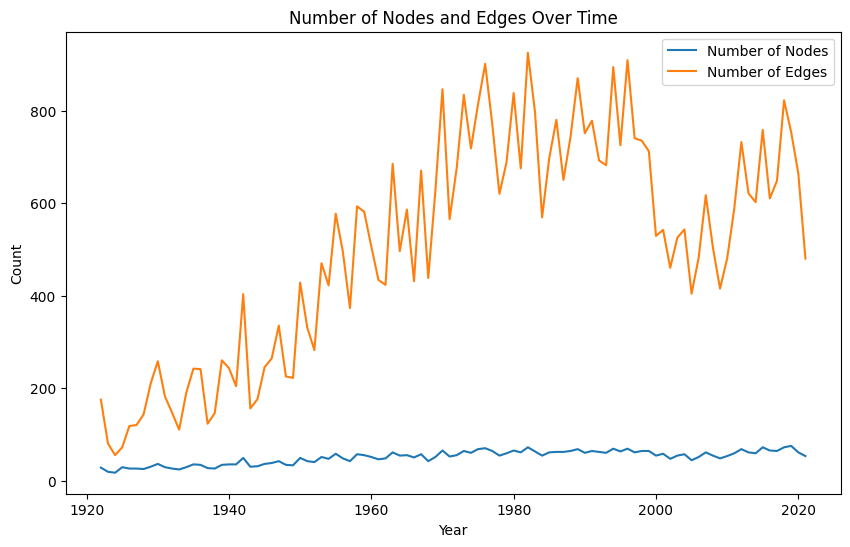

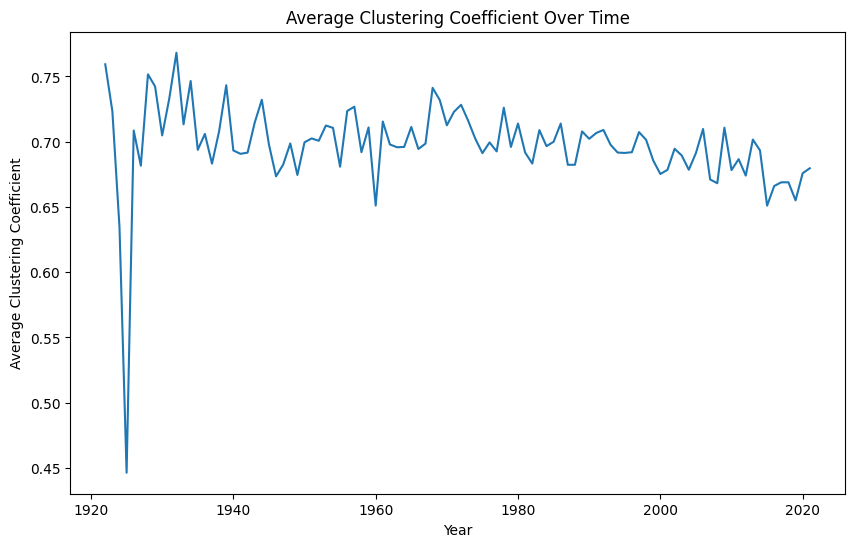

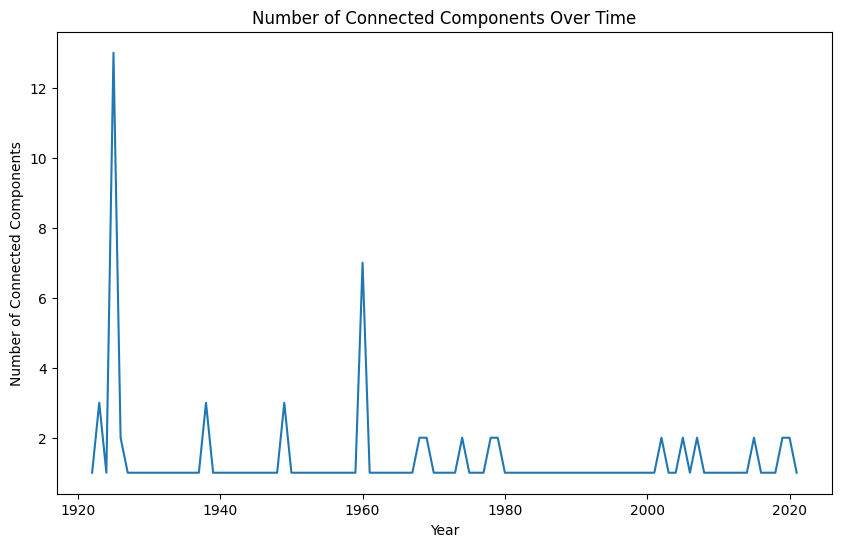

In [34]:
# Load JSON data
with open('./metrics/combined_cluster_metrics.json', 'r') as f:
    data = json.load(f)

# Extract properties
years = [d["year"] for d in data]
num_nodes = [d["num_nodes"] for d in data]
num_edges = [d["num_edges"] for d in data]
avg_clustering = [d["avg_clustering_coefficient"] for d in data]
num_connected_components = [d["number_of_connected_components"] for d in data]

# Plot Number of Nodes and Edges
plt.figure(figsize=(10,6))
plt.plot(years, num_nodes, label='Number of Nodes')
plt.plot(years, num_edges, label='Number of Edges')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Nodes and Edges Over Time')
plt.legend()
plt.show()

# Plot Clustering Coefficient
plt.figure(figsize=(10,6))
plt.plot(years, avg_clustering)
plt.xlabel('Year')
plt.ylabel('Average Clustering Coefficient')
plt.title('Average Clustering Coefficient Over Time')
plt.show()

# Plot Number of Connected Components
plt.figure(figsize=(10,6))
plt.plot(years, num_connected_components)
plt.xlabel('Year')
plt.ylabel('Number of Connected Components')
plt.title('Number of Connected Components Over Time')
plt.show()


In [35]:

# Load the JSON data
with open("./metrics/combined_cluster_metrics.json", "r") as file:
    network_data = json.load(file)

# Calculate additional network metrics for each network
for data in network_data:
    # Load the network from the GEXF file
    song_network = nx.read_gexf(data["path"])

    # Calculate additional network metrics
    data["avg_shortest_path_length"] = nx.average_shortest_path_length(song_network) if nx.is_connected(song_network) else "N/A"
    data["density"] = nx.density(song_network)
    data["transitivity"] = nx.transitivity(song_network)
    data["degree_centrality"] = nx.degree_centrality(song_network)
    data["betweenness_centrality"] = nx.betweenness_centrality(song_network)
    data["eigenvector_centrality"] = nx.eigenvector_centrality(song_network)
    data["pagerank"] = nx.pagerank(song_network)
    data["closeness_centrality"] = nx.closeness_centrality(song_network)
    data["degree_assortativity_coefficient"] = nx.degree_assortativity_coefficient(song_network)

# Save the updated JSON data
with open("combined_cluster_metrics_updated.json", "w") as file:
    json.dump(network_data, file, indent=4)
